<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests
job_list = pd.read_csv("./data/job_listings.csv")

description = []
for i in job_list['description']:
    soup = BeautifulSoup(i, 'html.parser')
    clean_soup = re.sub('["\']', ' ', soup.get_text())
    clean_soup = clean_soup.replace("\\n", ' ')
    description.append(clean_soup)

job_list['description'] = description

job_list.head()

,Unnamed: 0,description,title
0,0,b Job Requirements: Conceptual understanding i...,Data scientist
1,1,"b Job Description As a Data Scientist 1, you ...",Data Scientist I
2,2,b As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b $4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [9]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

DS_STOP_WORDS = ['data', ' ', 'b', 'Data', 'science', 'Science']

# Tokenizer Pipe
tokens = []
for doc in tokenizer.pipe(job_list['description'], batch_size=500):
    doc_tokens = [token.lower_.strip() for token in doc if ((token.is_stop != True) and (token.is_punct != True) and (token.text not in DS_STOP_WORDS))]
    tokens.append(doc_tokens)

job_list['tokens'] = tokens
job_list.head()

,Unnamed: 0,description,title,tokens
0,0,b Job Requirements: Conceptual understanding i...,Data scientist,"[job, requirements:, conceptual, understanding..."
1,1,"b Job Description As a Data Scientist 1, you ...",Data Scientist I,"[job, description, scientist, 1,, help, build,..."
2,2,b As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[scientist, working, consulting, business., re..."
3,3,"b $4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[$4,969, $6,756, monthcontractunder, general, ..."
4,4,b Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[location:, usa, \xe2\x80\x93, multiple, locat..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=5000, ngram_range=(1,3)) 

data = job_list['description']

#Learn our Vocab
vect.fit(data)
# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,000,000 employees,10,10 years,100,100 000,11,12,12 months,15,...,years work experience,years working,years xe2,years xe2 x80,yes,york,york city,yrs,zf,zillow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [12]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False) 
        #https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.rank.html
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [13]:
wc = count(job_list['tokens'])

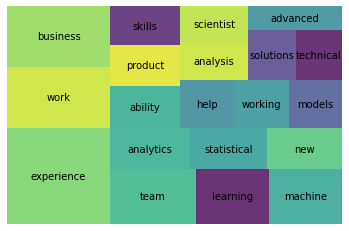

In [14]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 